## TASK 5
### BUSINESS ANALTYICS

#### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### IMPORTING THE DATASETS

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.nunique(axis=0,dropna=True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
data.info

<bound method DataFrame.info of            Ship Mode      Segment        Country             City  \
0       Second Class     Consumer  United States        Henderson   
1       Second Class     Consumer  United States        Henderson   
2       Second Class    Corporate  United States      Los Angeles   
3     Standard Class     Consumer  United States  Fort Lauderdale   
4     Standard Class     Consumer  United States  Fort Lauderdale   
5     Standard Class     Consumer  United States      Los Angeles   
6     Standard Class     Consumer  United States      Los Angeles   
7     Standard Class     Consumer  United States      Los Angeles   
8     Standard Class     Consumer  United States      Los Angeles   
9     Standard Class     Consumer  United States      Los Angeles   
10    Standard Class     Consumer  United States      Los Angeles   
11    Standard Class     Consumer  United States      Los Angeles   
12    Standard Class     Consumer  United States          Concord   
13

In [7]:
data.describe

<bound method NDFrame.describe of            Ship Mode      Segment        Country             City  \
0       Second Class     Consumer  United States        Henderson   
1       Second Class     Consumer  United States        Henderson   
2       Second Class    Corporate  United States      Los Angeles   
3     Standard Class     Consumer  United States  Fort Lauderdale   
4     Standard Class     Consumer  United States  Fort Lauderdale   
5     Standard Class     Consumer  United States      Los Angeles   
6     Standard Class     Consumer  United States      Los Angeles   
7     Standard Class     Consumer  United States      Los Angeles   
8     Standard Class     Consumer  United States      Los Angeles   
9     Standard Class     Consumer  United States      Los Angeles   
10    Standard Class     Consumer  United States      Los Angeles   
11    Standard Class     Consumer  United States      Los Angeles   
12    Standard Class     Consumer  United States          Concord   


#### ANALYSING THE CORRELATION

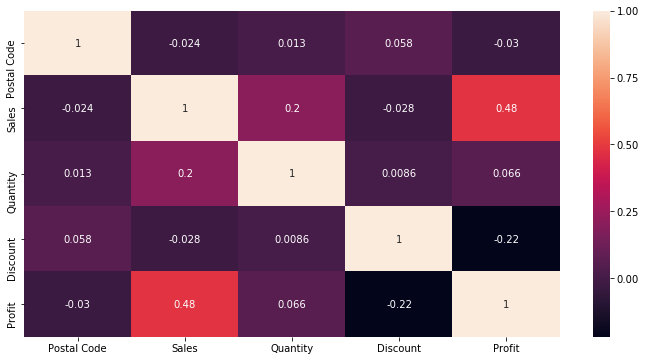

In [8]:
corr=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

#### CATEGORY AND SALES

Text(0, 0.5, 'Sales')

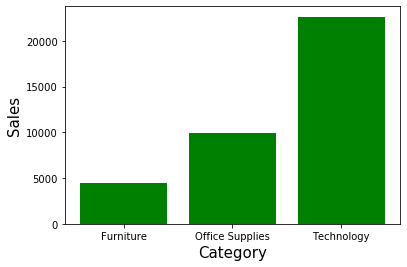

In [9]:
plt.bar('Category','Sales',data=data,color=['green'])
plt.xlabel ('Category',size=15)
plt.ylabel('Sales',size=15)

####  SHIPPING MODES

Text(0.5, 1.0, 'SHIPPING MODES')

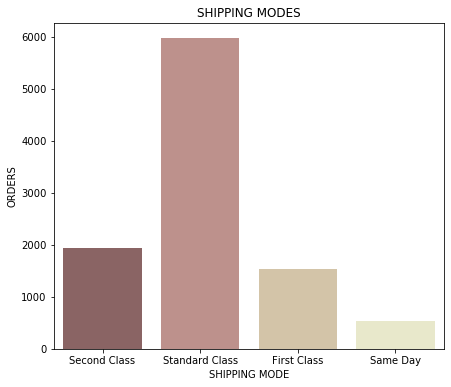

In [10]:
plt.figure(figsize=(7,6))
sns.countplot('Ship Mode',data=data, palette='pink')
plt.xlabel('SHIPPING MODE')
plt.ylabel('ORDERS')
plt.title('SHIPPING MODES')

#### ORDERING CITIES

In [11]:
topcities = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
topcities = topcities.head(5)
topcities.reset_index(drop=True,inplace=True)
topcities

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1


#### AMONG REGIONS

<function matplotlib.pyplot.show(*args, **kw)>

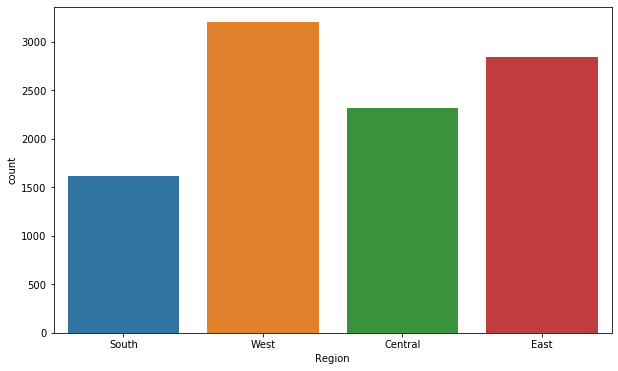

In [12]:
topreg=data.groupby('Region')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
topreg
plt.figure(figsize=(10,6))
sns.countplot(x=data['Region'])
plt.show

#### POPULAR CATEGORY

In [13]:
popcat = data.groupby('Category')['Quantity'].sum().reset_index()
popcat

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Products sold')

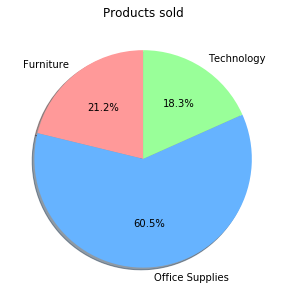

In [14]:
plt.figure(figsize=(5,5))
labels=popcat['Category'].unique()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(popcat['Quantity'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)
plt.title('Products sold')

#### PROFIT WITH RESPECT TO CATEGORY

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


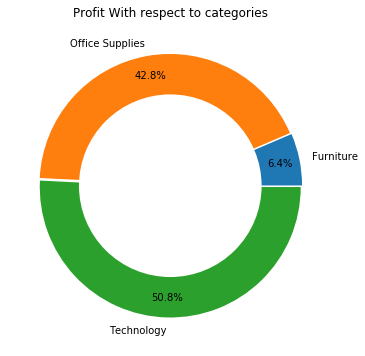

In [15]:
profit =data.groupby('Category')['Profit'].sum().reset_index()
print(profit)
plt.figure(figsize=(6,6))
labels=profit['Category'].unique()
plt.pie(profit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.01,0.01,0.01),pctdistance=0.85)
plt.title('Profit With respect to categories')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

#### PROFIT WITH RESPECT TO PRODUCTS

In [16]:
profit_pro =data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
profit_pro.reset_index(drop=True,inplace=True)
profit_pro=profit_pro.head(5)
profit_pro


,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633


Text(-9.074999999999982, 0.5, 'Profit')

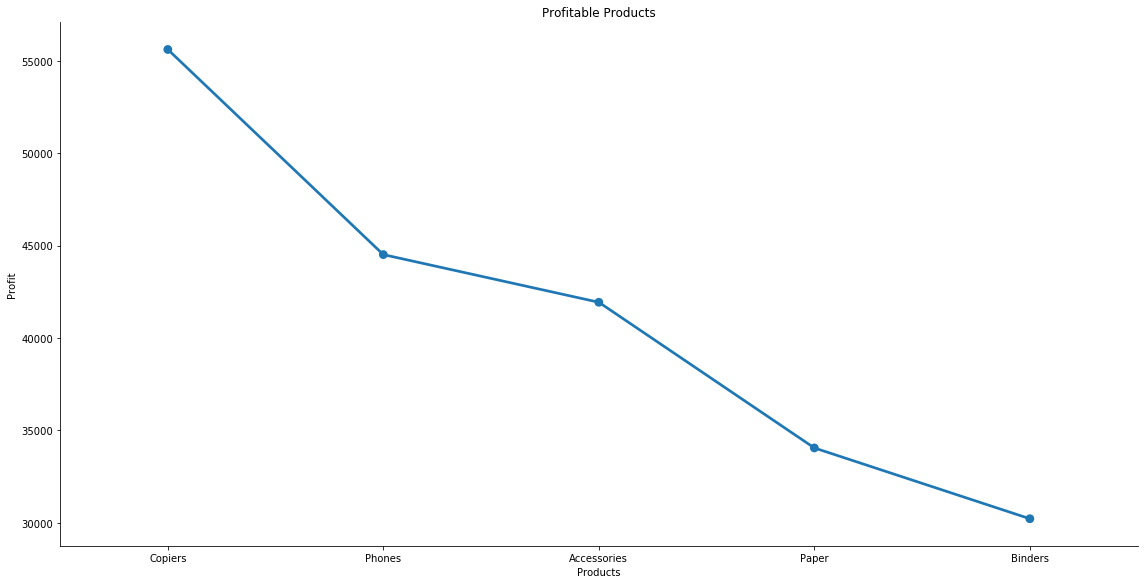

In [17]:
sns.catplot('Sub-Category','Profit',data=profit_pro, kind='point',aspect=2,height=8)
plt.title('Profitable Products')
plt.xlabel('Products')
plt.ylabel('Profit')

#### PROFITABLE CITIES

In [18]:
profit_city =data.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
profit_city.reset_index(drop=True,inplace=True)
profit_city=profit_city.head(5)
profit_city

,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908


Text(-9.074999999999982, 0.5, 'Profit')

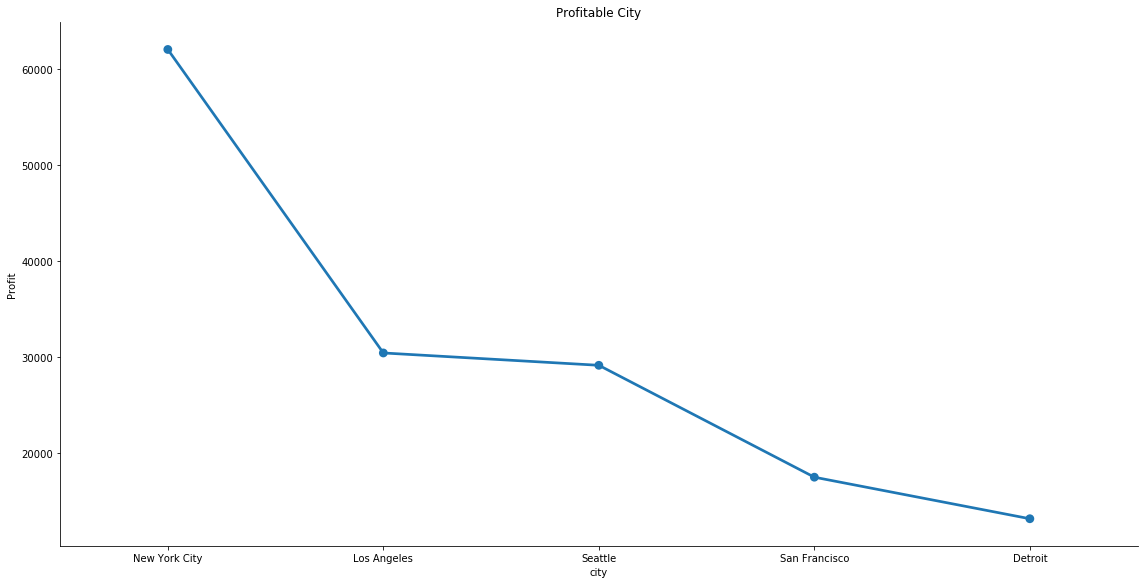

In [19]:
sns.catplot('City','Profit',data=profit_city, kind='point',aspect=2,height=8)
plt.title('Profitable City')
plt.xlabel('city')
plt.ylabel('Profit')

### THANK YOU!!!!!